Bureau of Economic Analysis API with Python
=====

## Composition of Construction Industry Gross Output


Example of using the BEA's API to retrieve data on which series are available and to retrieve the values for those series.

Updated: January 29, 2019 -- Added second example on contributions to PCE growth

The BEA API documentation is available [here](https://www.bea.gov/API/bea_web_service_api_user_guide.htm)

In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv

load_dotenv()
api_key = os.environ.get("BUREAU_API_KEY")


SyntaxError: incomplete input (1222461635.py, line 6)

### Gather data on value parameters in order to make request

In [2]:
# Components of request
base = 'https://apps.bea.gov/api/data/?&UserID={}'.format(api_key)
get_param = '&method=GetParameterValues'
dataset = '&DataSetName=GDPbyIndustry'
param = 'TableID'

In [3]:
# Construct URL from parameters above
url = '{}{}{}&ParameterName={}&ResultFormat=json'.format(base, get_param, dataset, param)

# Request parameter information from BEA API
r = requests.get(url).json()

# Show the results as a table:
pd.DataFrame(r['BEAAPI']['Results']['ParamValue']).set_index('Key')

,Desc
Key,
1,Value Added by Industry (A) (Q)
5,Value added by Industry as a Percentage of Gro...
6,Components of Value Added by Industry (A)
7,Components of Value Added by Industry as a Per...
8,Chain-Type Quantity Indexes for Value Added by...
9,Percent Changes in Chain-Type Quantity Indexes...
10,Real Value Added by Industry (A) (Q)
11,Chain-Type Price Indexes for Value Added by In...
12,Percent Changes in Chain-Type Price Indexes fo...


In [4]:
param = 'Industry'

# Construct URL from parameters above
url = '{}{}{}&ParameterName={}&ResultFormat=json'.format(base, get_param, dataset, param)

# Request parameter information from BEA API
r = requests.get(url).json()

# Show the results as a table:
pd.DataFrame(r['BEAAPI']['Results']['ParamValue']).set_index('Key')

,Desc
Key,
11,"Agriculture, forestry, fishing, and hunting (A,Q)"
111CA,"Farms (A,Q)"
113FF,"Forestry, fishing, and related activities (A,Q)"
21,"Mining (A,Q)"
211,"Oil and gas extraction (A,Q)"
...,...
ORE,"Other real estate (A,Q)"
PGOOD,"Private goods-producing industries (A,Q)"
PROF,"Professional and business services (A,Q)"


### Use parameters obtained above to request data from API

In [5]:
m = '&method=GetData'
ind = '&TableId=25'
freq = '&Frequency=A'
year = '&Year=ALL'
fmt = '&ResultFormat=json'
indus = '&Industry=23'  # Construction Industry

# Combined url for request
url = '{}{}{}{}{}{}{}{}'.format(base, m, dataset, year, indus, ind, freq, fmt)

In [6]:
r = requests.get(url).json()

In [7]:
df = pd.DataFrame(r['BEAAPI']['Results'][0]['Data'])
df = df.replace('Construction', 'Gross Output')
df = df.set_index([pd.to_datetime(df['Year']), 'IndustrYDescription'])['DataValue'].unstack(1)
df = df.apply(pd.to_numeric)
df.tail()

IndustrYDescription,Compensation of employees,Energy inputs,Gross Output,Gross operating surplus,Intermediate inputs,Materials inputs,Purchased-services inputs,Taxes on production and imports less subsidies,Value added
Year,,,,,,,,,
2017-01-01,520.4,35.4,1570.3,270.1,769.6,571.0,163.3,10.1,800.6
2018-01-01,558.3,42.3,1648.0,278.3,800.7,593.3,165.1,10.7,847.3
2019-01-01,598.5,37.9,1722.9,294.0,818.9,604.4,176.6,11.5,904.0
2020-01-01,598.3,32.5,1795.9,349.2,901.6,637.7,231.4,-53.1,894.4
2021-01-01,635.6,48.6,1964.5,331.4,1019.1,733.4,237.1,-21.7,945.3


## Plot Employee share of gross profit

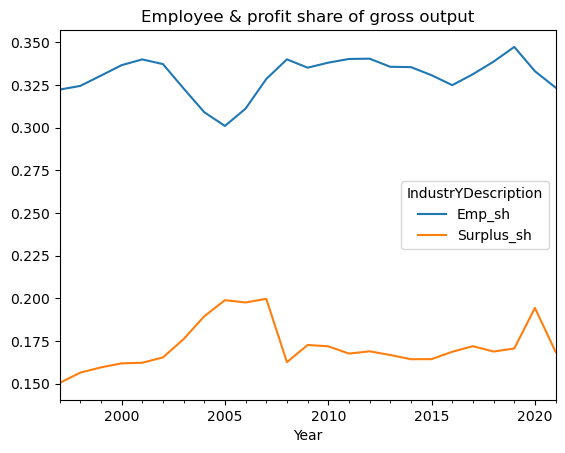

In [8]:
df['Emp_sh'] = df['Compensation of employees'] / df['Gross Output']
df['Surplus_sh'] = df['Gross operating surplus'] / df['Gross Output']

%matplotlib inline
df[['Emp_sh', 'Surplus_sh']].plot(title='Employee & profit share of gross output');

### GDP Report Data - Real PCE by Major Type of Product

REQUIRES PYTHON 3.6+

In [9]:
import requests
import pandas as pd
import config   ## File with API key

In [10]:
# Components of request
base = f'https://apps.bea.gov/api/data/?&UserID={config.bea_key}'
dset = '&method=GetData&datasetname=NIPA'
tbl = 'T20306' # Real PCE by Major Type of Product: NIPA Table 2.3.6.
freq = '&Frequency=Q'
yr = ','.join(map(str, range(2000, 2021)))
fmt = '&ResultFormat=json'
url = f'{base}{dset}&TableName={tbl}{freq}&Year={yr}{fmt}'

In [11]:
# Request data
r = requests.get(url).json()['BEAAPI']['Results']

In [12]:
d = {}

for series in ['DPCERX', 'DDURRX', 'DNDGRX', 'DSERRX']:
    data = [int(i['DataValue'].replace(',', ''))
            for i in r['Data'] if i['SeriesCode'] == series]
    index = [pd.to_datetime(i['TimePeriod'])
             for i in r['Data'] if i['SeriesCode'] == series]
    d[series] = pd.Series(data=data, index=index)

In [13]:
df = pd.DataFrame(d)
dft = df.diff()
dft = dft.div(dft['DPCERX'], axis=0)
df = dft.multiply((((df['DPCERX'].pct_change() + 1) ** 4) - 1) * 100, axis=0)

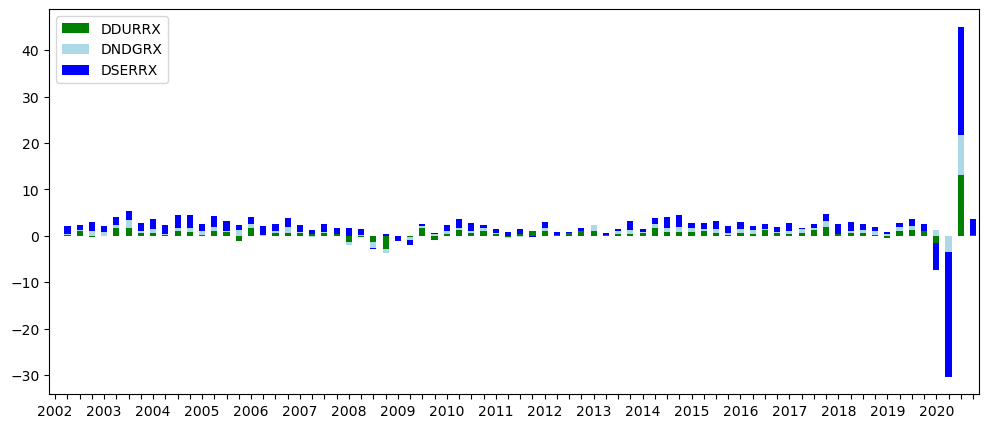

In [14]:
def line_format(index):
    label = ''
    if index.month_name()[:3] == 'Jan':
        label += f'{index.year}'
    return label

%matplotlib inline
d = df[['DDURRX', 'DNDGRX', 'DSERRX']]
ax = d.plot(kind='bar', stacked=True, figsize=(12, 5), 
            rot=0, color=['green', 'lightblue', 'blue'])
ax.set_xticklabels(map(lambda x: line_format(x), df.index));